# Properties of Networks

## Network descriptors

Remember that a network, a collection of nodes $\mathcal V$, edges $\mathcal E$, and other attributes, can be represented as an $n \times n$ adjacency matrix, where $n$ is the total number of nodes. The adjacency matrix is the matrix:

\begin{align*}
    A &= \begin{bmatrix}
        a_{11} & ... & a_{1n} \\
        \vdots & \ddots & \vdots \\
        a_{n1} & ... & a_{nn}
    \end{bmatrix},
\end{align*}
We will now discuss some properties about the network that somewhat simplify the possibilities for $A$.

To simplify this discussion, we will begin with an example. Let's say we have a network which represents the five boroughs of New York (Staten Island SI, Brooklyn BK, Queens Q, the Bronx BX, and Manhattan MH). The nodes in our network are the boroughs, of which there are $5$ total. The edges $(i,j)$ of our network exist if one can travel from borough $i$ to borough $j$ along a bridge or directly by a road.

Below, we will look at a map of New York City, with the bridges connecting the different boroughs. In the middle, we look at this map as a network layout plot. The arrows indicate which direction you can travel from one borough to the other. On the right, we look at this map as an adjacency matrix:

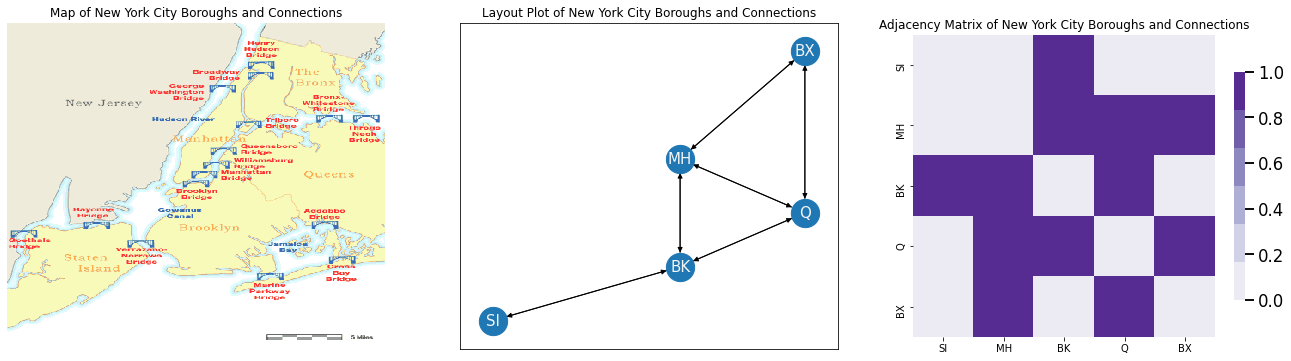

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from graphbook_code import heatmap

img = mpimg.imread('./img/newyork.png')

G = nx.DiGraph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("BK", "Q")
G.add_edge("Q", "BX")

G.add_edge("BK", "SI")
G.add_edge("BK", "MH")
G.add_edge("Q", "MH")
G.add_edge("BX", "MH")
G.add_edge("Q", "BK")
G.add_edge("BX", "Q")

A = nx.to_numpy_matrix(G)

fig, axs = plt.subplots(1,3, figsize=(23, 6))
axs[0].imshow(img, alpha=.8, interpolation='nearest', aspect='auto')
axs[0].axis('off')
axs[0].set_title("Map of New York City Boroughs and Connections")
nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[1].set_title("Layout Plot of New York City Boroughs and Connections")
heatmap(A, ax=axs[2], xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
axs[2].set_title("Adjacency Matrix of New York City Boroughs and Connections")
axs[2].set_xticklabels(["SI", "MH", "BK", "Q", "BX"])
axs[2].set_yticklabels(["SI", "MH", "BK", "Q", "BX"])
fig;

### Undirected networks do not have *directionality*

When you decide to travel from borough $i$ to borough $j$, you care about whether you can *actually drive* on that road! In a similar way, the concept of directedness describes whether we need to worry about one-way bridges and bridge closures! If there are one-way bridges in our network, then a bridge from borough $i$ to borough $j$ doesn't *necessarily* imply that a bridge from borough $j$ to borough $i$ exists (just ask New York drivers). If, for instance, the Brooklyn bridge was closed from Manhattan to Brooklyn, our network might change like this. Note that the red edge from Manhattan (MH) to Brooklyn (BK) is no longer present:

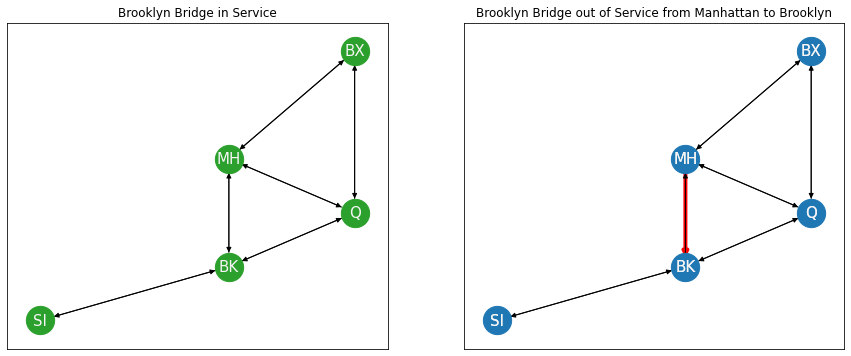

In [24]:
fig, axs=plt.subplots(1,2,figsize=(15, 6))

nx.draw_networkx(G, pos, ax=axs[0], with_labels=True, node_color="tab:green", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[0].set_title("Brooklyn Bridge in Service")

G.remove_edge("MH", "BK")

G2 = nx.DiGraph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("MH", "BK")

nx.draw_networkx(G2, pos, ax=axs[1], with_labels=True, node_color="tab:blue",
                font_size=15, font_color="whitesmoke", arrows=True, edge_color="red",
                width=4)
nx.draw_networkx(G, pos, ax=axs[1], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
axs[1].set_title("Brooklyn Bridge out of Service from Manhattan to Brooklyn")
fig;

Fortunately, in network machine learning, we usually only care about the undirected case, or when both directions of the bridge are fully operational. A network is **undirected** if a connection between node $i$ and node $j$ implies that node $j$ is also connected to node $i$. For the adjacency matrix $A$, remember a connection between nodes $i$ and $j$ is represented by the adjacency $a_{ij}$. In an undirected network, $a_{ij} = a_{ji}$, for all pairs of nodes $i$ and $j$. For this reason, we will usually omit the arrows entirely, like we show below:

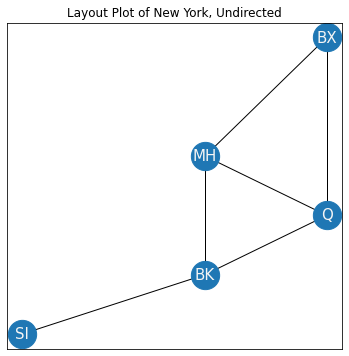

In [25]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("BK", "Q")
G.add_edge("Q", "BX")

fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
ax.set_title("Layout Plot of New York, Undirected")
fig;

By definition, note that this implies that for $A$, that $a_{ij} = a_{ji}$ for all $i$ and $j$. This also happens to, by definition, tell us that the adjacency matrix $A$ is symmetric, so $A = A^\top$ for an unweighed network.

### Loopless networks do not have self-loops

If we are already in a borough, why would we want to take a bridge to that same borough? This logic relates to the concept of *self-loops* in a network. A **self-loop** in a network describes whether nodes can connect back to themselves. For instance, consider the following loop from Staten Island back to itself:

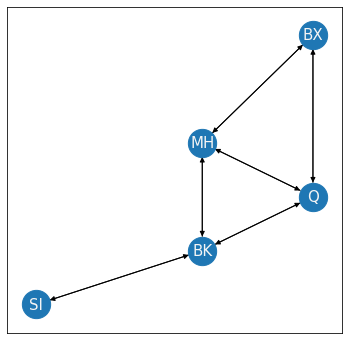

In [26]:
# TODO: add arrow from SI to SI
G = nx.DiGraph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("BK", "Q")
G.add_edge("Q", "BX")

G.add_edge("BK", "SI")
G.add_edge("BK", "MH")
G.add_edge("Q", "MH")
G.add_edge("BX", "MH")
G.add_edge("Q", "BK")
G.add_edge("BX", "Q")
G.add_edge("SI", "SI")

fig, ax = plt.subplots(1,1, figsize=(6,6))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)

In this example, the concept of self-loops is a little trite, but it is worth mentioning as you might see it arise elsewhere. A network is **loopless** if self-loops are not possible. For the adjacency matrix $A$, a self-loop would be represented by the adjacencies $a_{ii}$ for all nodes $i$. Note that these entries $a_{ii}$ are all of the *diagonal* entries of $A$. Therefore, for a network which is loopless, all adjacencies $a_{ii}$ on the diagonal are $0$. You might also see this property abbreviated by stating that the diagonal of the adjacency matrix is $0$, or $diag(A) = 0$. 

### Unweighted networks either have an edge, or they don't

Do we need to convey information about how long it takes to get from borough $i$ to borough $j$ with our network? This fundamental question underlies the concept of *weightedness* in networks. We could use things called *edge-weights* $w(i, j)$ could be used to describe the amount of time it takes to get from borough $i$ to borough $j$. An **edge-weight** $w(i,j)$ assigns a weight to an edge between nodes $i$ and $j$ if that edge exists. If we care about weightedness in the network, the network is called *weighted*. The adjacencies $a_{ij}$ of $A$ for a weighted network take the value of the edge-weight; that is, $a_{ij} = w_{ij}$ for any edge which exists between nodes $i$ and $j$. In the below plot, edge-weight indicates the approximate time to travel from one borough to the other. The network will be undirected, so we don't have to worry about directionality differences:






For most purposes, we will largely be considered with *binary* networks, which are also more traditionally called *unweighted* networks. A network is **unweighted** or **binary** if we only care about whether edges are *present* or *absent*. In a network which is unweighted, an adjacency $a_{ij}$ takes the value $1$ if there is an edge from node $i$ to node $j$, and takes the value $0$ if there is *not* an edge from node $i$ to node $j$.



```{admonition} This book considers networks which are *simple networks*
This point is a *really* big deal, so we figured we would make it look extra special with a box. A **simple network** is one which is loopless, undirected, and unweighted. Fortunately, this note is largely conceptual, and doesn't really impact much from a software implementation perspective. All the techniques and packages we use will make sensible choices, or will directly extend, to cases that fall outside of this particular setup, so if your networks you want to analyze don't satisfy one or any of these properties, you have nothing to worry about!
```

## Node Descriptors

### Node adjacencies and incidences

We begin by descrcibing properties of single nodes in a simple network. The simplest property of a network is *adjacency*. A pair of nodes $i$ andd $j$ in an undirected network are **adjacent** if an edge exists between nodes $i$ and $j$. In terms of the adjacency matrix, two nodes $i$ and $j$ are adjacent if the adjacency $a_{ij}$ takes the value a value of one. For instance, in the New York City example, the nodes SI and BK are adjacent due to the presence of the green edge, shown in the figure. A related property is known as *incidence*. A node $i$ is incident an edge $(i, j)$ or an edge $(j,i)$ if the node $i$ is one of the two nodes which the edge connects. The adjacencies corresponding to this edge, $a_{ij}$ and $a_{ji}$, will both take a value of one. For instance, the nodes SI and BK are incident the green edge shown in the figure, as this edge connects SI to BK:

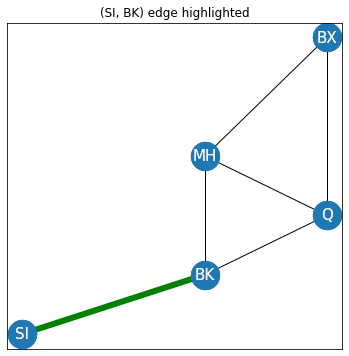

In [68]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("BK", "Q")
G.add_edge("Q", "BX")

G2 = nx.Graph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("SI", "BK")

fig, ax = plt.subplots(1,1,figsize=(6,6))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
nx.draw_networkx(G2, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", width=6, edge_color="green", arrows=True)
ax.set_title("(SI, BK) edge highlighted")
fig;

### Node degree quantifies the number of incidences

The simplest summary statistic for a node in a network is known as the *node degree*. The *node degree* of a node $i$ is the number of edges incident node $i$. From the description above, we learned that every edge incident a node $i$ will have $a_{ij}$ take the value of one. Therefore, we can count the edges incident a node $i$ by simply summing all of the adjacencies corresponding to a *potential* edge incident a node $i$:

\begin{align*}
    degree(v_i) &= \sum_{i = 1}^n a_{ji} = \sum_{j = 1}^n a_{ij}
\end{align*}
This means we will sum all of the potential edges which do *not* exist (any of the $a_{ij}$s which take a value of zero, and therefore no edge exists between nodes $i$ and $j$) with all of the edges which *do* exist and are incident node $i$ (since these $a_{ij}$s will take a value of one). For instance, if we consider the node BK in our example, we have three incident edges, indicated in green, so $degree(v_{BK}) = 3$. When we look at the corresponding adjacency matrix, if we sum the adjacencies for node $v_{BK}$, we also get three. The adjacencies which would be summed $\sum_{i = 1}^n a_{ij}$ are shown in green, and the adjacencies which would be summed $\sum_{j = 1}^n a_{ij}$ are shown in red:

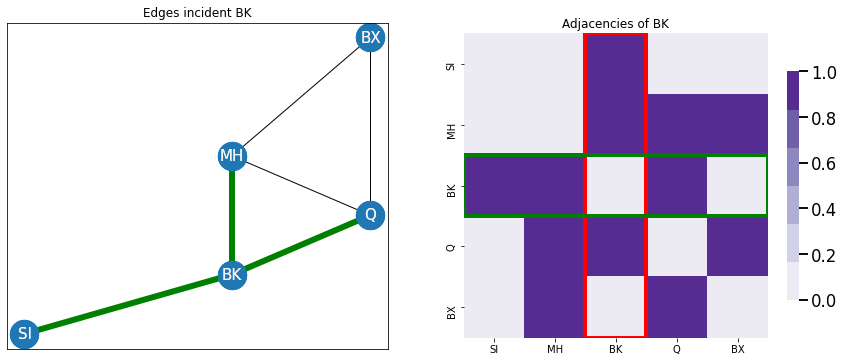

In [78]:
import matplotlib.patches as patches

G2 = nx.Graph()

G2.add_node("SI", pos=(1,1))
G2.add_node("MH", pos=(4,4))
G2.add_node("BK", pos=(4,2))
G2.add_node("Q", pos=(6,3))
G2.add_node("BX", pos=(6,6))

G2.add_edge("SI", "BK")
G2.add_edge("MH", "BK")
G2.add_edge("Q", "BK")

fig, ax = plt.subplots(1,2,figsize=(15,6))
nx.draw_networkx(G, pos, ax=ax[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", arrows=True)
nx.draw_networkx(G2, pos, ax=ax[0], with_labels=True, node_color="tab:blue", node_size = 800,
        font_size=15, font_color="whitesmoke", width=6, edge_color="green", arrows=True)
ax[0].set_title("Edges incident BK")

A = nx.to_numpy_matrix(G)
heatmap(A, ax=ax[1], xticklabels=[0.5,1.5,2.5,3.5,4.5], yticklabels=[0.5,1.5,2.5,3.5,4.5])
ax[1].set_title("Adjacencies of BK")
ax[1].set_xticklabels(["SI", "MH", "BK", "Q", "BX"])
ax[1].set_yticklabels(["SI", "MH", "BK", "Q", "BX"])


ax[1].add_patch(
     patches.Rectangle(
         (2,0),
         1.0,
         5.0,
         edgecolor='red',
         fill=False,
         lw=4
     ) )

ax[1].add_patch(
     patches.Rectangle(
         (0,2),
         5.0,
         1.0,
         edgecolor='green',
         fill=False,
         lw=4
     ) )

fig;

## Network summary statistics tell us useful attributes about networks

where $a_{ij}$ takes the value of $1$ if nodes $i$ and $j$ are connected, and the value $0$ if nodes $i$ and $j$ are not connected. When we learn about networks, it is often valuable to compute properties of the network so that we can get a better understanding of relationships that might exist within it. Here, we cover some useful quantities we might want to compute about a network.

### The network density indicates the fraction of possible edges which exist

Given an unweighted, undirected, loopless network $A$, what fraction of the possible edges *actually* exist? 

To understand this quantity, first we need to understand how many edges are possible in a network. We have $n$ total nodes in the network, which means that $A$ is an $n \times n$ matrix. This means that $A$ has $n^2$ entries, in total. However, it turns out that over *half* of these entries are redundant. Since we said that the network was loopless, this means that every entry is *by default* $0$ along the diagonal. Since each node $i$ has a corresponding diagonal entry $a_{ii}$, this comes to $n$ entries in total that we do not need to count. This leaves our total possible number of edges at $n^2$ (the total number of entries in the matrix $A$) minus $n$ (the total number of entries which are automatically $0$), or $n^2 - n = n(n - 1)$. This quantity represents the total number of possible edges which are *not* in the diagonal.

What else are we overcounting? Well, as it turns out, since the network is also *undirected*, this means that every node that is *not* in the diagonal is also being double counted. Why is this? Remember that a network which is undirected has an adjacency matrix where for every pair of nodes $i$ and $j$, $a_{ij} = a_{ji}$. This means that we overcount the number of possible edges not in the diagonal by a factor of *two*, since all off-diagonal entries $a_{ij}$ have a corresponding pair $a_{ji}$. This leaves the total number of possible edges in the network as $\frac{1}{2}n(n - 1)$, or the total number of possible edges not in the diagonal reduced by a factor of two. This quantity is equivalent to the notation $\binom n 2$, which is read as "$n$ *choose* $2$". You might see this notation arise in the study of *combinatorics*, where it is used to answer the question of, "In how many ways can we *choose* two items from $n$ items?" In the network below, we see all of the *possible* edges indicated in red. If you count them up, there are $\frac{1}{2}\cdot 5 \cdot (5 - 1) = 10$ red edges, in total:

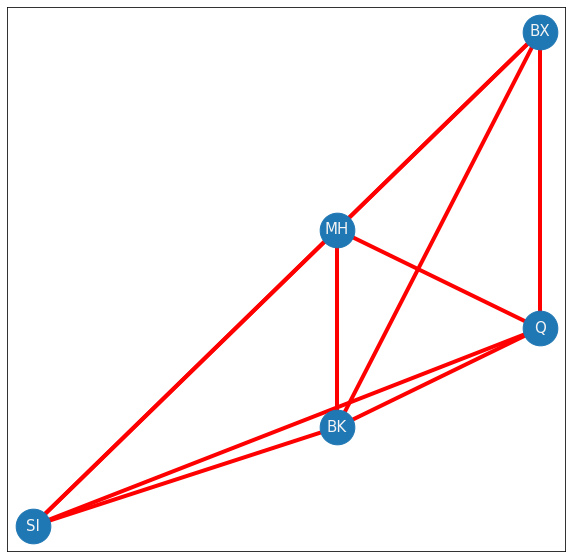

In [53]:
G_poss = nx.Graph()

nodes = {"SI": (1,1), "MH": (4,4), "BK": (2,2), "Q": (6,3), "BX": (6,6)}

for (node, posn) in nodes.items():
    G_poss.add_node(node, pos=posn)
    
node_keys = list(nodes.keys())

# add all possible combinations of nodes as red edges
for i, nodei in enumerate(node_keys):
    for j, nodej in enumerate(node_keys[i+1:]):
        G_poss.add_edge(nodei, nodej)


fig, ax = plt.subplots(1,1,figsize=(10,10))
nx.draw_networkx(G_poss, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="red", width=4, alpha=1, arrows=True)

Now, how many edges *actually* exist in our network? The sum of all of the entries of $A$ can be represented by the quantity $\sum_{i = 1}^n \sum_{i = 1}^n a_{ij}$, however, again there are some redundancies when considering the total edge-count of $A$. Remember that $A$ is loopless, so we don't need to count the diagonal entries at all. This brings our quantity to $\sum_{i = 1}^n \sum_{i \neq j}a_{ij}$, since we don't need to count any edges along the diagonal of $A$. Next, remember that if an edge in $A$ exists between nodes $i$ and $j$, that *both* $a_{ij}$ and $a_{ji}$ take the value of $1$, due to the undirected property. This means that to obtain the edge count of $A$, that we only need to count *either* $a_{ij}$ *or* $a_{ji}$. Somewhat arbitrarily in this book, we will always count the adjacencies $a_{ij}$ in the upper triangle of $A$, which are the entries where $j > i$. This brings our quantity to $\sum_{i = 1}^n \sum_{j > i} a_{ij}$, which we can write $\sum_{j > i}a_{ij}$ for short. The edges which exist in our network will be indicated with green, in the following figure, of which there are $6$ total:

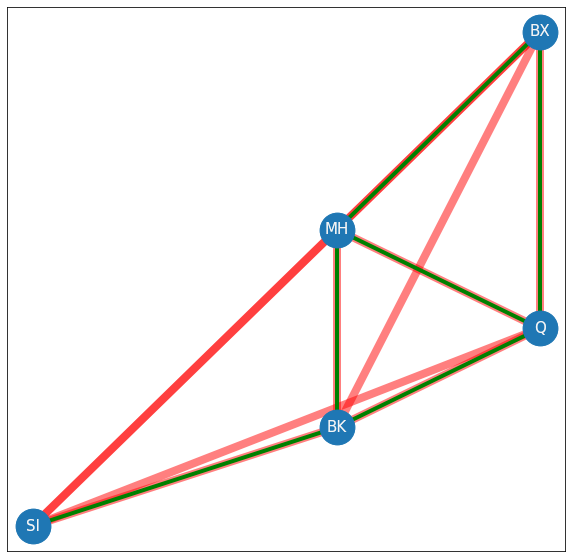

In [54]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))
G.add_node("BX", pos=(6,6))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("MH", "BX")
G.add_edge("BK", "Q")
G.add_edge("Q", "BX")

fig, ax = plt.subplots(1,1,figsize=(10,10))
nx.draw_networkx(G_poss, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="red", width=8, alpha=.5, arrows=True)

nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", edge_color="green", width=4, arrows=True)

The **network density** is a summary statistic which indicates the *density of edges* which are present in the network. For an unweighted, undirected network, the network density can be defined as the ratio between the total number of edges in $A$ and the total number of edges possible in $A$:
\begin{align*}
    density(A) &= \frac{\sum_{j > i}a_{ij}}{\frac{n(n - 1)}{2}} = \frac{2\sum_{j > i}a_{ij}}{n(n - 1)}
\end{align*}
In our example, this is simply the ratio of green edges to red edges, which is $\frac{6}{10} = 0.6$.

### The clustering coefficient indicates the degree to which nodes tend to cluster together

The clustering coefficient inddicates the fraction of triplets of nodes which are closed. What the heck is that? Let's take a look at a subsset of nodes from our example network. To do this, we will look only at the boroughs Staten Island, Manhattan, Brooklyn, and Queens. Our network looks like this:

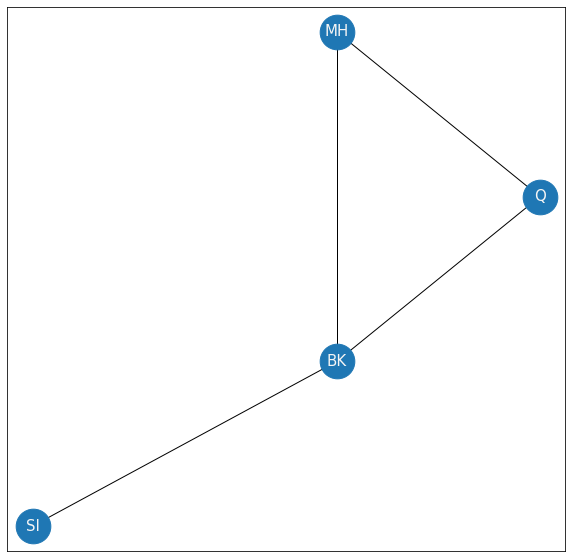

In [57]:
G = nx.Graph()

G.add_node("SI", pos=(1,1))
G.add_node("MH", pos=(4,4))
G.add_node("BK", pos=(4,2))
G.add_node("Q", pos=(6,3))

pos = nx.get_node_attributes(G, 'pos')
G.add_edge("SI", "BK")
G.add_edge("MH", "BK")
G.add_edge("MH", "Q")
G.add_edge("BK", "Q")


fig, ax = plt.subplots(1,1,figsize=(10,10))
nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color="tab:blue", node_size = 1200,
        font_size=15, font_color="whitesmoke", arrows=True)

To begin to define the clustering coefficient, we first must understand what a *triplet of nodes* is. A **triplet of nodes** is three nodes which are connected by two or three edges. For instance, in the above network, we have the following triplets of nodes:
1. {SI, MH, BK}: two edges,
2. {SI, BK, Q}: two edges,
3. {BK, MH, Q}: three edges,
and one three-node sets which is *not* a triplet between {SI, ,MH, Q}, which is not a triplet because there is only a single edge between MH andd Q amongst the three nodes. A triplet is *closed* if there are three edges, and is open if there are only two edges. In our example, there is one closed triplet {BK, MH, Q}, and there are two open triplets {SI, MH, BK} and {SI, BK, Q}. The global clustering coefficient is defined as:

\begin{align*}
    C &= \frac{\text{number of closed triplets}}{\text{number of closed triplets} + \text{number of open triplets}}
\end{align*}
In our example, this comes to $C = \frac{1}{1 + 2} = \frac{1}{3}$. This equation can also be understood in terms of the adjacency matrix. Note that if a triplet between nodes $i$, $j$, and $k$ is closed, then all three of the adjacenies $a_{ij}$, $a_{jk}$, and $a_{ki}$ have a value of $1$. Therefore, if we could the number of times that $a_{ij}a_{jk}a_{ki} = 1$, we also count the number of closed triplets! This means that the number of closed triplets can be expressed as $\sum_{i,j,k}a_{ij}a_{jk}a_{ki}$. 

Further, note that for a given node $i$, that we can find an arbitrary triplet (either open or closed) by selecting first one of the neighbors of node $i$, for which there are $d_i$ total, where $d_i = degree(v_i)$. Next, we can select a *different* neighbor of node $i$, for which there are $d_i - 1$ total. This gives us a triplet consisting of node $i$, one of $d_i$ possible nodes, and one of $d_i - 1$ possible nodes, since there will exist at least two edges between them (one edge from node $i$ to one of its $d_i$ neighbors, and the other edge from node $i$ to one of its other $d_i - 1$ neighbors). Therefore, the number of open and closed triplets is the quantity $\sum_i d_i (d_i - 1)$.  Then we could express the clustering coefficient in terms of the adjacency matrix as:

\begin{align*}
    C &= \frac{\sum_{i,j,k}a_{ij}a_{jk}a_{ki}}{\sum_i d_i (d_i - 1)}, \;\;\; d_i = degree(v_i)
\end{align*}
which is a bit easier to implement programmatically.

### The average path length indicates the efficiency of information flow through the network

### Network summary statistics can be misleading when comparing networks

## The degree matrix indicates the degrees of each node

## The network laplacian is useful for computing properties about networks

## Subnetworks are subsets of larger networks

### The largest connected component (LCC) is the largest subnetwork of connected nodes